In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')

In [3]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=17)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
model.score(X_test,y_test)

0.84

In [9]:
model.score(X_train,y_train)

0.9966666666666667

In [11]:
import numpy as np
age = np.linspace(X_train['Age'].min(),X_train['Age'].max(),100)
sal = np.linspace(X_train['EstimatedSalary'].min(),X_train['EstimatedSalary'].max(),100)
grid = []
for i in age:
    for j in sal:
        grid.append([i,j])
grid = np.array(grid)
grid.shape

(10000, 2)

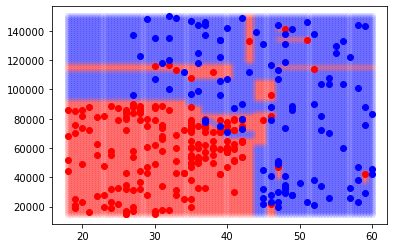

In [13]:
# Predict using DT
yp = model.predict(grid)
c0 = grid[yp==0]
c1 = grid[yp==1]
plt.scatter(c0[:,0], c0[:,1],c='red',alpha=0.1)
plt.scatter(c1[:,0], c1[:,1],c='blue',alpha=0.1)

# Plotting actual class from training dataset
c0 = X_train[y_train==0]
c1 = X_train[y_train==1]
plt.scatter(c0.values[:,0], c0.values[:,1],c='red')
plt.scatter(c1.values[:,0], c1.values[:,1],c='blue')

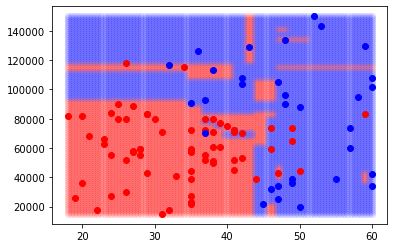

In [12]:
# Predict using DT
yp = model.predict(grid)
c0 = grid[yp==0]
c1 = grid[yp==1]
plt.scatter(c0[:,0], c0[:,1],c='red',alpha=0.1)
plt.scatter(c1[:,0], c1[:,1],c='blue',alpha=0.1)

# Plotting actual class from testing dataset
c0 = X_test[y_test==0]
c1 = X_test[y_test==1]
plt.scatter(c0.values[:,0], c0.values[:,1],c='red')
plt.scatter(c1.values[:,0], c1.values[:,1],c='blue')

# Regularizing Decision Boundry

In [18]:
model_1 = DecisionTreeClassifier(min_samples_leaf=4)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=4)

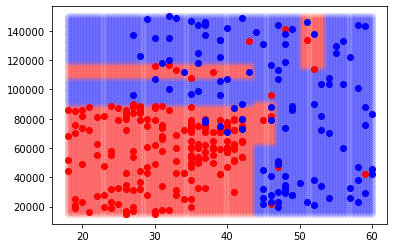

In [19]:
# Predict using DT
yp = model_1.predict(grid)
c0 = grid[yp==0]
c1 = grid[yp==1]
plt.scatter(c0[:,0], c0[:,1],c='red',alpha=0.1)
plt.scatter(c1[:,0], c1[:,1],c='blue',alpha=0.1)

# Plotting actual class from training dataset
c0 = X_train[y_train==0]
c1 = X_train[y_train==1]
plt.scatter(c0.values[:,0], c0.values[:,1],c='red')
plt.scatter(c1.values[:,0], c1.values[:,1],c='blue')

In [20]:
model_1.score(X_test,y_test)

0.85

In [22]:
for depth in range(2,6):
    for min_samples in range(2,7):
        model = DecisionTreeClassifier(min_samples_leaf=min_samples, max_depth=depth, random_state=100)
        model.fit(X_train,y_train)
        print(min_samples, depth , model.score(X_test,y_test))

2 2 0.88
3 2 0.88
4 2 0.88
5 2 0.88
6 2 0.88
2 3 0.88
3 3 0.88
4 3 0.88
5 3 0.88
6 3 0.88
2 4 0.85
3 4 0.87
4 4 0.87
5 4 0.86
6 4 0.86
2 5 0.82
3 5 0.85
4 5 0.85
5 5 0.86
6 5 0.86


In [23]:
final_model = DecisionTreeClassifier(min_samples_leaf=3, max_depth=2, random_state=100)
final_model.fit(X_train,y_train)
final_model.score(X_test,y_test)

0.88